<a href="https://colab.research.google.com/github/bioai96/Pytorch/blob/main/Pytorch_%ED%9A%8C%EA%B7%80_%EC%98%88%EC%B8%A1_DeepChem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -q "http://deepchem.io.s3-website-us-west-1.amazonaws.com/datasets/Lipophilicity.csv" -O Lipophilicity.csv

In [ ]:
import pandas as pd

data = pd.read_csv('Lipophilicity.csv')
data
# exp : log P 값 얼마나 지질 요소가 높은지 

,CMPD_CHEMBLID,exp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...
...,...,...,...
4195,CHEMBL496929,3.85,OCCc1ccc(NC(=O)c2cc3cc(Cl)ccc3[nH]2)cc1
4196,CHEMBL199147,3.21,CCN(C1CCN(CCC(c2ccc(F)cc2)c3ccc(F)cc3)CC1)C(=O...
4197,CHEMBL15932,2.10,COc1cccc2[nH]ncc12
4198,CHEMBL558748,2.65,Clc1ccc2ncccc2c1C(=O)NCC3CCCCC3


##SMILES 데이터를 사용해서 molecular fingerprint를 만듬

In [ ]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 82.3 MB/s 


In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np

In [ ]:
fps = []
for i, smiles in enumerate(data['smiles']):
  mol = Chem.MolFromSmiles(smiles)
  arr = np.zeros((1,0))
  fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2048)
  DataStructs.ConvertToNumpyArray(fp, arr)

  fps.append(arr)

data['fp'] = fps
data

,CMPD_CHEMBLID,exp,smiles,fp
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
4195,CHEMBL496929,3.85,OCCc1ccc(NC(=O)c2cc3cc(Cl)ccc3[nH]2)cc1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4196,CHEMBL199147,3.21,CCN(C1CCN(CCC(c2ccc(F)cc2)c3ccc(F)cc3)CC1)C(=O...,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4197,CHEMBL15932,2.10,COc1cccc2[nH]ncc12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4198,CHEMBL558748,2.65,Clc1ccc2ncccc2c1C(=O)NCC3CCCCC3,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(data, test_size=0.1, random_state=42)
train, val = train_test_split(train_val, test_size=0.1/0.9, random_state=42)

datasets = {
    "train": train,
    "val":  val,
    "test": test
}

datasets

{'train':       CMPD_CHEMBLID   exp                                             smiles  \
 2224  CHEMBL2005730  3.20        COC(=O)c1ccc(NC(=O)c2cc(OC)c(OC)c(OC)c2)cc1   
 3302   CHEMBL412142  3.86  Cc1c[nH]c(n1)c2cnc(NCCNc3ccc(cn3)C#N)nc2c4ccc(...   
 1489  CHEMBL1900501  3.09                       Oc1ccc(C(=O)Cc2ccccc2)c(O)c1   
 2998   CHEMBL117869  0.66  COC(=O)c1c(O)cccc1OC\C=C\c2ccc(F)c(c2)c3onc(c3...   
 3297   CHEMBL495841  2.20       Nc1cccc(NS(=O)(=O)c2ccc(cc2)c3ccc(cc3)C#N)n1   
 ...             ...   ...                                                ...   
 1284  CHEMBL1427554  2.59                        Cc1ccc(cc1)c2csc3ncnc(O)c23   
 3125   CHEMBL177756  0.00       OC(=O)c1ccccc1C2=C3C=CC(=O)C=C3Oc4cc(O)ccc24   
 2929   CHEMBL383669  3.80  CC(C)CN1C(=O)N(C)C(=O)c2c1sc(Cc3ccccc3C(F)(F)F...   
 1682  CHEMBL1778624  0.90             OC(=O)COc1ccc(cc1c2ccc(Cl)cc2)C(F)(F)F   
 1516  CHEMBL1084327  1.18  OC(=O)CC(=O)N[C@H]1[C@@H](Cc2ccccc12)NC(=O)c3c...   
 
                 

### 커스텀데이터세트 만들기

In [ ]:
import torch
from torch.utils.data import Dataset

class LipoDataset(Dataset) :
    def __init__(self,df):
      self.x = list(df['fp'])
      self.y = list(df['exp'].values)

    def __len__(self):
      return len(self.x)

    def __getitem__(self, index):
      return torch.tensor(self.x[index]).float(), torch.tensor(self.y[index]).float()

lipodata = {
    "train" : LipoDataset(datasets["train"]),
    "val": LipoDataset(datasets["val"]),
    "test": LipoDataset(datasets["test"]),
}

lipodata

{'train': <__main__.LipoDataset at 0x7efb8119bb10>,
 'val': <__main__.LipoDataset at 0x7efb8119b350>,
 'test': <__main__.LipoDataset at 0x7efb8119b850>}

### MLP 모델 만들기

In [ ]:
import torch.nn as nn 

class MLP(nn.Module):

  def __init__(self):
    super(MLP, self).__init__()

    self.linear1 = nn.Linear(2048,1024)
    self.linear2 = nn.Linear(1024,256)
    self.output = nn.Linear(256,1)
    self.dropout1 = nn.Dropout(0.5)
    self.relu = nn.ReLU()

  def forward(self,x):
    out = self.linear1(x)
    out = self.dropout1(out)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.dropout1(out)
    out = self.relu(out)
    out = self.output(out)
    return out

  
model = MLP()
model


MLP(
  (linear1): Linear(in_features=2048, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=1, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
)

In [ ]:
## 모델 GPU에 올리기 
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# model.to(device)


### 데이터 로더 만들기

In [ ]:
from torch.utils.data import DataLoader 

dataloaders = {
    "train" : DataLoader(lipodata["train"], batch_size=32, shuffle=True),
    "val" : DataLoader(lipodata["val"], batch_size=32, shuffle=False),
    "test" : DataLoader(lipodata["test"], batch_size=32, shuffle=False),
}
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7efb811f73d0>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7efb811f7110>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7efb811f7d90>}

In [ ]:
for data in dataloaders["train"]:
    x, y = data

print(y[:10])

tensor([-1.3600,  1.9700,  3.2100,  1.8600,  3.5000, -0.9700,  2.8800,  2.7000,
        -0.4200,  3.4000])


### 모델 학습하기

In [ ]:
# 최적화 함수 정의
import torch.optim as optim

loss_fn = nn.MSELoss() # MEAN Squared Error 
optimizer = optim.Adam(model.parameters(), lr = 0.005)

In [ ]:
torch.manual_seed(42)

epochs = 51
train_losses = []
val_losses = []


for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0
    for i, data in enumerate(dataloaders["train"]):
        x, y = data[0], data[1]
        optimizer.zero_grad()

        outputs = model(x)
        train_loss = loss_fn(outputs, y.view(-1, 1))
        train_loss.backward()
        optimizer.step()
        
        epoch_train_loss += train_loss.item()
        
    model.eval()
    epoch_val_loss = 0.0
    with torch.inference_mode():
        for i, data in enumerate(dataloaders["val"]):
            x, y = data[0], data[1]
                        
            outputs = model(x)
            val_loss = loss_fn(outputs, y.view(-1, 1))
            epoch_val_loss += val_loss.item()
            
    epoch_train_loss /= len(dataloaders["train"])
    epoch_val_loss /= len(dataloaders["val"])
    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    
    if epoch % 10 == 0:
        print("[Epoch %d] Train Loss: %.3f  Validation Loss: %.3f" %
              (epoch, epoch_train_loss, epoch_val_loss))

[Epoch 0] Train Loss: 0.539  Validation Loss: 0.780
[Epoch 10] Train Loss: 0.573  Validation Loss: 0.812
[Epoch 20] Train Loss: 0.531  Validation Loss: 0.701
[Epoch 30] Train Loss: 0.468  Validation Loss: 0.692
[Epoch 40] Train Loss: 0.488  Validation Loss: 0.727
[Epoch 50] Train Loss: 0.535  Validation Loss: 0.714


### 결과

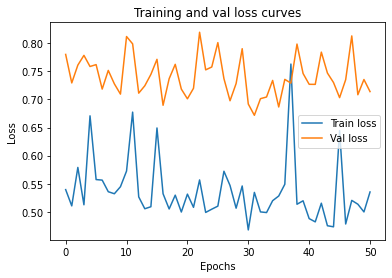

In [ ]:
import matplotlib.pyplot as plt

epoch_count = range(epochs)
plt.plot(epoch_count, train_losses, label="Train loss")
plt.plot(epoch_count, val_losses, label="Val loss")
plt.title("Training and val loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

### 훈련된 모델로 예측 값 생성하기

In [ ]:
from sklearn.metrics import mean_absolute_error 

model.eval()
mae = 0.0
predictions = []
truths = []
with torch.inference_mode():
  for data in dataloaders['test']:
    x,y = data[0], data[1]
    outputs = model(x)
    labels = y.cpu().detach().numpy().tolist()
    preds = [output[0] for output in outputs.cpu().detach().numpy().tolist()]

    truths += labels
    predictions += preds

    mae += mean_absolute_error(labels, preds)

  mae /= len(dataloaders["test"])
mae

0.6657859710934905